In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd

def optimal_portfolio(returns):
    
    n = len(returns)
    returns = np.asmatrix(returns)
    
    #print(2)
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    #print(3)
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    #print(4)
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    #print(5)
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    
    #print(6)
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    
    #print(7)
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    #print(8)
    
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    #print(9)
    return np.asarray(wt), returns, risks

In [65]:
import numpy
from pymongo import MongoClient
from datetime import datetime, timedelta as td

def DataFrameFromMongo(stock,startDate='',endDate=''):
    client = MongoClient()
    db = client.Project
    if startDate=='' and endDate=='':
        data = pd.DataFrame(list(db.HistPrices.find({'BBGTicker':stock})))
    else:
        d1 = datetime.strptime(startDate, '%Y-%m-%d')
        d2 = datetime.strptime(endDate, '%Y-%m-%d') 
        delta = (d2-d1).days+1
        dateList=[]
        for i in range(delta):
            dateList.append((d1+td(days=i)).strftime('%Y-%m-%d'))
        data = pd.DataFrame(list(db.HistPrices.find({'Date':{"$in":dateList},'BBGTicker':stock})))
    records = pd.DataFrame({stock:np.array(data['Close'])}, index=data['Date'])
    return (records)

In [67]:
from pymongo import MongoClient
client = MongoClient()
db = client.Project

startDate = ''
endDate = ''
stocks =[x['BBGTicker'] for x in list(db.Stocks.find({}))]

AllPrices = pd.DataFrame() 
if startDate=='' and endDate=='':
    # Do nothing
else:
    #print("test2")
    #d1 = datetime.strptime(startDate, '%Y-%m-%d')
    #d2 = datetime.strptime(endDate, '%Y-%m-%d') 
    #delta = (d2-d1).days+1
    #for i in range(delta):
        #db.HistSignals.delete_many({'Date':(d1+td(days=i)).strftime('%Y-%m-%d')})
for s in stocks:
    #print(s)
    if startDate=='' and endDate=='':
        data = DataFrameFromMongo(s) 
    else:
        d = (datetime.strptime(startDate, '%Y-%m-%d') - td(days=90)).strftime('%Y-%m-%d')
        data = DataFrameFromMongo(s,d,endDate)
            
    AllPrices = pd.concat([AllPrices, data], axis=1)

suck1
EXPD
ESRX
FB
FAST
FISV
GRMN
GILD
HSIC
ILMN
INCY
INTC
INTU
ISRG
KLAC
GMCR
KHC
LRCX
LBTYA
LMCA
LVNTA
LLTC
MAR
MAT
MU
MSFT
MDLZ
MNST
MYL
NTAP
NFLX
NVDA
ORLY
PCAR
PAYX
QCOM
REGN
ROST
SNDK
SBAC
STX
SIRI
SWKS
SPLS
SBUX
SRCL
SYMC
TSLA
TXN
PCLN
TSCO
TRIP
VRSK
VRTX
VIAB
VIP
VOD
WBA
WDC
WFM
WYNN
XLNX
YHOO
FOXA
FOX
ATVI
ADBE
AKAM
ALXN
GOOGL
GOOG
AMZN
AAL
AMGN
ADI
AAPL
AMAT
ADSK
ADP
AVGO
BIDU
BBBY
BIIB
BMRN
BRCM
CHRW
CA
CELG
CERN
CHTR
CHKP
CSCO
CTXS
CTSH
CMCSK
CMCSA
COST
DISCA
DISCK
DISH
DLTR
EBAY
EA
Get LOST.


In [75]:
AllRets = AllPrices.pct_change()
AllRets.tail()

,EXPD,ESRX,FB,FAST,FISV,GRMN,GILD,HSIC,ILMN,INCY,...,CTSH,CMCSK,CMCSA,COST,DISCA,DISCK,DISH,DLTR,EBAY,EA
2016-10-10,-0.000582,0.007279,0.009691,-0.004255,0.005601,0.002678,0.003323,0.007851,0.001951,-0.019217,...,0.001986,NaN,0.006426,0.001933,-0.004785,-0.003020,0.009919,-0.000641,0.010436,0.011097
2016-10-11,-0.006990,-0.021822,-0.010442,-0.051282,-0.014024,-0.012533,-0.022122,-0.027049,-0.248093,-0.040021,...,-0.011100,NaN,-0.012466,0.004858,-0.023669,-0.022340,-0.011964,-0.008727,-0.015336,-0.016167
2016-10-12,0.003911,0.001883,0.001319,-0.022523,0.009684,0.003953,-0.010702,-0.001135,-0.020217,-0.023233,...,0.001804,NaN,0.004310,-0.003642,-0.008712,-0.010457,0.004880,0.002978,0.001271,-0.010076
2016-10-13,-0.007012,-0.001735,-0.009531,-0.018433,-0.003597,-0.005596,0.000411,-0.015147,0.007270,-0.004891,...,0.025410,NaN,-0.001839,-0.001595,-0.018724,-0.020744,0.024820,0.009810,0.000317,-0.009330
2016-10-14,0.000392,0.010429,0.000704,0.000000,0.003309,0.007295,-0.004243,-0.017238,0.006051,-0.027142,...,-0.017463,NaN,0.001689,-0.000333,-0.013240,-0.011591,-0.000176,-0.014572,0.012060,0.010152


In [140]:
dataHist = AllRets.tail(22*3*2).dropna(axis=1, how='any').copy()
trainData = dataHist.head(22*3).copy()
testData = dataHist.tail(22*3).copy()

weights, returns, risks = optimal_portfolio(trainData.T)

1
2
3
4
5
     pcost       dcost       gap    pres   dres
 0: -9.1607e-04 -1.0062e+00  1e+00  1e-16  1e+01
 1: -9.2153e-04 -1.6228e-02  2e-02  2e-16  2e-01
 2: -1.1895e-03 -6.3274e-03  5e-03  2e-16  5e-02
 3: -3.6376e-03 -8.7094e-03  5e-03  4e-16  4e-02
 4: -5.7343e-03 -6.2303e-03  5e-04  2e-16  3e-03
 5: -6.2003e-03 -6.2056e-03  5e-06  8e-16  3e-05
 6: -6.2051e-03 -6.2051e-03  5e-08  8e-17  3e-07
 7: -6.2051e-03 -6.2051e-03  5e-10  3e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.1532e-04 -1.0062e+00  1e+00  2e-16  1e+01
 1: -9.2079e-04 -1.6227e-02  2e-02  6e-16  2e-01
 2: -1.1887e-03 -6.3265e-03  5e-03  1e-16  5e-02
 3: -3.6379e-03 -8.7107e-03  5e-03  6e-16  4e-02
 4: -5.7291e-03 -6.2268e-03  5e-04  1e-16  3e-03
 5: -6.1967e-03 -6.2020e-03  5e-06  2e-15  3e-05
 6: -6.2015e-03 -6.2015e-03  5e-08  3e-18  3e-07
 7: -6.2015e-03 -6.2015e-03  5e-10  2e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.1449e-0

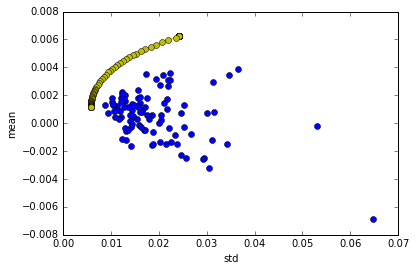

In [142]:
# Plot the efficient frontier
plt.plot(trainData.std(axis=0), trainData.mean(axis=0), 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')

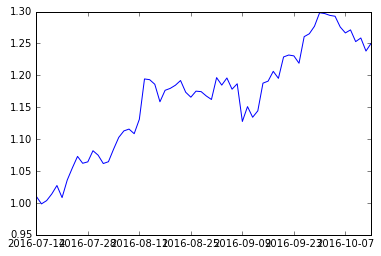

In [171]:
PortRets = weights.T*testData
PortRetsWeighted = (1+PortRets.sum(axis=1)).cumprod()
PortRetsWeighted.plot()

In [172]:
import numpy as np
from scipy import linalg

# blacklitterman
#   This function performs the Black-Litterman blending of the prior
#   and the views into a new posterior estimate of the returns using the
#   alternate reference model as shown in Idzorek's paper.
# Inputs
#   delta  - Risk tolerance from the equilibrium portfolio
#   weq    - Weights of the assets in the equilibrium portfolio
#   sigma  - Prior covariance matrix
#   tau    - Coefficiet of uncertainty in the prior estimate of the mean (pi)
#   P      - Pick matrix for the view(s)
#   Q      - Vector of view returns
#   Omega  - Matrix of variance of the views (diagonal)
# Outputs
#   Er     - Posterior estimate of the mean returns
#   w      - Unconstrained weights computed given the Posterior estimates
#            of the mean and covariance of returns.
#   lambda - A measure of the impact of each view on the posterior estimates.
#
def altblacklitterman(delta, weq, sigma, tau, P, Q, Omega):
    # Reverse optimize and back out the equilibrium returns
    # This is formula (12) page 6.
    pi = weq.dot(sigma * delta)
    # We use tau * sigma many places so just compute it once
    ts = tau * sigma
    # Compute posterior estimate of the mean
    # This is a simplified version of formula (8) on page 4.
    middle = linalg.inv(np.dot(np.dot(P,ts),P.T) + Omega)
    er = np.expand_dims(pi,axis=0).T + np.dot(np.dot(np.dot(ts,P.T),middle),(Q - np.expand_dims(np.dot(P,pi.T),axis=1)))
    # Compute posterior estimate of the uncertainty in the mean
    # This is a simplified and combined version of formulas (9) and (15)
    # Compute posterior weights based on uncertainty in mean
    w = er.T.dot(linalg.inv(delta * sigma)).T
    # Compute lambda value
    # We solve for lambda from formula (17) page 7, rather than formula (18)
    # just because it is less to type, and we've already computed w*.
    lmbda = np.dot(linalg.pinv(P).T,(w.T * (1 + tau) - weq).T)
    return [er, w, lmbda]

# idz_omega
#   This function computes the Black-Litterman parameters Omega from
#   an Idzorek confidence.
# Inputs
#   conf   - Idzorek confidence specified as a decimal (50% as 0.50)
#   P      - Pick matrix for the view
#   Sigma  - Prior covariance matrix
# Outputs
#   omega  - Black-Litterman uncertainty/confidence parameter
#
def bl_omega(conf, P, Sigma):
    alpha = (1 - conf) / conf
    omega = alpha * np.dot(np.dot(P,Sigma),P.T)
    return omega

# Function to display the results of a black-litterman shrinkage
# Inputs
#   title	- Displayed at top of output
#   assets	- List of assets
#   res		- List of results structures from the bl function
#
def display(title,assets,res):
    er = res[0]
    w = res[1]
    lmbda = res[2]
    print('\n' + title)
    line = 'Country\t\t'
    for p in range(len(P)):
        line = line + 'P' + str(p) + '\t'
    line = line + 'mu\tw*'
    print(line)

    i = 0;
    for x in assets:
        line = '{0}\t'.format(x)
    for j in range(len(P.T[i])):
        line = line + '{0:.1f}\t'.format(100*P.T[i][j])

    line = line + '{0:.3f}\t{1:.3f}'.format(100*er[i][0],100*w[i][0])
    print(line)
    i = i + 1

    line = 'q\t\t'
    i = 0
    for q in Q:
        line = line + '{0:.2f}\t'.format(100*q[0])
        i = i + 1
    print(line)

    line = 'omega/tau\t'
    i = 0
    for o in Omega:
        line = line + '{0:.5f}\t'.format(o[i]/tau)
        i = i + 1
    print(line)

    line = 'lambda\t\t'
    i = 0
    for l in lmbda:
        line = line + '{0:.5f}\t'.format(l[0])
        i = i + 1
    print(line)

In [392]:
# Take the values from Idzorek, 2005.
weq = np.ones(len(trainData.columns))/len(trainData.columns)#np.array(weights).flatten() # Start with Markowitz weights
V = np.cov(trainData.T*100)#np.cov(trainData.T) # Is this supposed to be the covariance matrix? Annualize?
refPi = np.array(np.mean(trainData, axis=0)) # TBD: What is this line for? Benchmark weights?
assets=stocks

# Risk aversion of the market 
delta = 3.07 # TBD: What number should we use?

# Coefficient of uncertainty in the prior estimate of the mean
# from footnote (8) on page 11
tau = 0.025 # What level of uncertainty do we use for prior means?
tauV = tau * V

# Zero vector for each stock
zeroVec = np.zeros(len(testData.columns))

# Define view 1
# International Developed Equity will have an excess return of 5.25%
# with a confidence of 25%.
P1 = zeroVec.copy()
P1[0] = 1
#P1 = np.random.normal(size=len(testData.columns)) # Stock 0 will outperform
Q1 = np.array([0.0525]) # Excess return
conf1 = 0.05 # Confidence level

# Define view 2
# International Bonds will outperform US Bonds by 0.0025 with a
# confidence of 50%.
P2 = zeroVec.copy()
P2[1] = 1 # Stock 1 will underperform
Q2 = np.array([0.0025]) # Excess return
conf2 = 0.05 # Confidence level

# Define View 3
# US Large and Small Growth will outperform US Large and Small Value
# by 0.02 with a confidence of 65%.
P3 = zeroVec.copy()
P3[2] = 1 # Stock 2 will outperform
Q3 = np.array([0.02]) # Excess return
conf3 = 0.05 # Confidence level

# Combine the views
P=np.array([P1,P2,P3])
Q=np.array([Q1,Q2,Q3])

# Apply the views with simple Omega
Omega = np.dot(np.dot(P,tauV),P.T)
res1 = altblacklitterman(delta, weq, V, tau, P, Q, Omega)
display('Simple Omega',assets,res)

# Now apply the views using the Idzorek's method
tauV = tau * V
Omega = np.array([[bl_omega(conf1, P1, tauV), 0, 0],[0, bl_omega(conf2, P2, tauV), 0],[0, 0, bl_omega(conf3, P3, tauV)]])
res2 = altblacklitterman(delta, weq, V, tau, P, Q, Omega)
display('Idzorek Method',assets,res)


Simple Omega
Country		P0	P1	P2	mu	w*
EA	100.0	0.0	0.0	29996.711	-1450.000
q		5.25	0.25	2.00	
omega/tau	1.42043	1.02114	2.07892	
lambda		-14.87270	11.92583	-0.77895	

Idzorek Method
Country		P0	P1	P2	mu	w*
EA	100.0	0.0	0.0	29996.711	-1450.000
q		5.25	0.25	2.00	
omega/tau	26.98810	19.40170	39.49940	
lambda		-14.87270	11.92583	-0.77895	


In [394]:
sum(res1[1])

array([-164.671875])

In [395]:
sum(res2[1])

array([-237.453125])

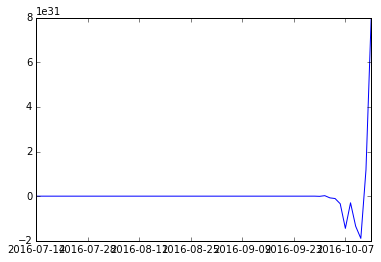

In [396]:
PortRetsBL1 = res1[1].T*testData
PortRetsWeightedBL1 = (1+PortRetsBL1.sum(axis=1)).cumprod()
PortRetsWeightedBL1.plot()

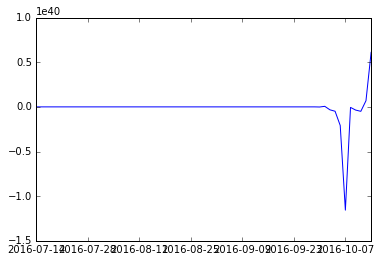

In [437]:
PortRetsBL2 = res2[1].T*testData
PortRetsWeightedBL2 = (1+PortRetsBL2.sum(axis=1)).cumprod()
PortRetsWeightedBL2.plot()

In [ ]:
PortRetsBL2 = res2[1].T*testData
PortRetsWeightedBL2 = (1+PortRetsBL2.sum(axis=1)).cumprod()
PortRetsWeightedBL2.plot()

In [398]:
from GetBenchmarkPortfolio import GetBenchmarkPortfolio

In [429]:
Benchmark = GetBenchmarkPortfolio("NASDAQOMX/NDX","XjcRZJvcrRDyzTzjdGBR",trainData.tail(1).index,testData.tail(1).index)

In [432]:
BenchmarkRets = (1+Benchmark.pct_change().dropna()).cumprod()
BenchmarkTest = BenchmarkRets.tail(22*3)

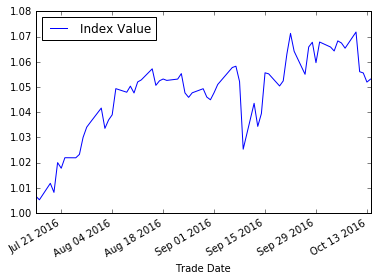

In [433]:
BenchmarkTest.plot()

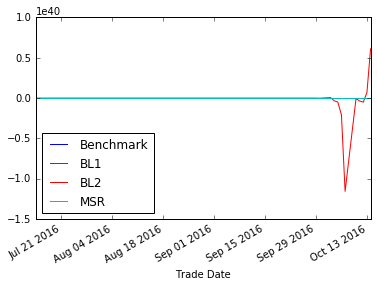

In [444]:
# Final Chart
FinalPlot = pd.concat([BenchmarkTest, PortRetsWeightedBL1, PortRetsWeightedBL2, PortRetsWeighted], axis=1)
FinalPlot.columns = ["Benchmark", "BL1", "BL2", "MSR"]
FinalPlot.plot()

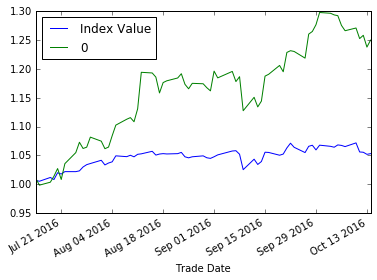

In [445]:
pd.concat([BenchmarkTest, PortRetsWeighted], axis=1).plot()